In [0]:
# Load datasets
market_data_path = "dbfs:/FileStore/tables/final_market_data.csv"  # Replace with your Databricks path
income_data_path = "dbfs:/FileStore/tables/preprocessed_income_data.csv"  # Replace with your Databricks path

market_data = spark.read.csv(market_data_path, header=True, inferSchema=True)
income_data = spark.read.csv(income_data_path, header=True, inferSchema=True)

# Show schema of the datasets
market_data.printSchema()
income_data.printSchema()

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- state_code: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- median_sale_price: integer (nullable = true)
 |-- median_sale_price_mom: double (nullable = true)
 |-- median_list_price: double (nullable = true)
 |-- median_list_price_yoy: double (nullable = true)
 |-- median_ppsf: double (nullable = true)
 |-- median_list_ppsf: double (nullable = true)
 |-- homes_sold: integer (nullable = true)
 |-- pending_sales: double (nullable = true)
 |-- new_listings: double (nullable = true)
 |-- inventory: double (nullable = true)
 |-- months_of_supply: double (nullable = true)
 |-- median_dom: double (nullable = true)
 |-- avg_sale_to_list: double (nullable = true)
 |-- sold_above_list: double (nullable = true)
 |-- price_drops: double (nullable = true)
 |-- off_market_in_two_weeks: double (nullable = true)
 |-- Region Category: string (nullable = true)
 |-- year: integer (nullable = true)

+-------+----+-------+----------+---------------+------------------+---------------------+-----------------+---------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+-----------------------+---------------+------------------+
|summary|city|  state|state_code|  property_type| median_sale_price|median_sale_price_mom|median_list_price|median_list_price_yoy|       median_ppsf|  median_list_ppsf|       homes_sold|     pending_sales|      new_listings|         inventory|  months_of_supply|       median_dom|    avg_sale_to_list|    sold_above_list|        price_drops|off_market_in_two_weeks|Region Category|              year|
+-------+----+-------+----------+---------------+------------------+---------------------+-----------------+---------------------+------------------+------------------+-----------------+------------

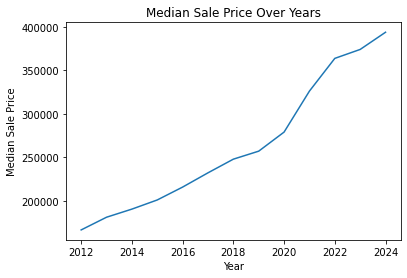

In [0]:
#ANALYZE THE MARKET DATA
from pyspark.sql.functions import col, year, avg, stddev, when, lag
from pyspark.sql.window import Window
import matplotlib.pyplot as plt

# Basic summary statistics
market_data.describe().show()

# Aggregate median sale prices over years
market_data.groupBy("year").agg(avg("median_sale_price").alias("avg_price")).orderBy("year").show()

# Visualize trends using Pandas and Matplotlib
market_df = market_data.toPandas()
market_df.groupby("year")["median_sale_price"].mean().plot(kind="line", title="Median Sale Price Over Years")
plt.xlabel("Year")
plt.ylabel("Median Sale Price")
plt.show()


+-------------+------+--------------------+--------+----+------------+
|      GeoName|Region|         Description|Category|year|income_value|
+-------------+------+--------------------+--------+----+------------+
|United States|      |Current receipts,...|        |2012|   6.46006E8|
|United States|      |Current receipts,...|        |2013|   6.67343E8|
|United States|      |Current receipts,...|        |2014|   6.63945E8|
|United States|      |Current receipts,...|        |2015|   6.80073E8|
|United States|      |Current receipts,...|        |2016|   7.16884E8|
|United States|      |Current receipts,...|        |2017|   7.65865E8|
|United States|      |Current receipts,...|        |2018|   7.60399E8|
|United States|      |Current receipts,...|        |2019|   7.93576E8|
|United States|      |Current receipts,...|        |2020|   7.93049E8|
|United States|      |Current receipts,...|        |2021|   7.94496E8|
|United States|      |Current receipts,...|        |2022|   6.88469E8|
|Unite

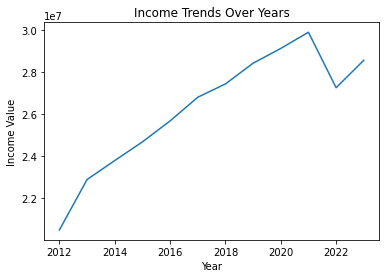

In [0]:
#ANALYZE INCOME DATA
# Reshape income data for analysis
# Reshape income data using selectExpr (PySpark equivalent of pandas.melt)
income_long = income_data.selectExpr(
    "GeoName", 
    "Region", 
    "Description", 
    "Region Category",
    "stack(12, '2012', `2012`, '2013', `2013`, '2014', `2014`, '2015', `2015`, '2016', `2016`, \
     '2017', `2017`, '2018', `2018`, '2019', `2019`, '2020', `2020`, '2021', `2021`, '2022', `2022`, '2023', `2023`) as (year, income_value)"
)

# Ensure the 'year' column is cast to integer for consistency
income_long = income_long.withColumn("year", col("year").cast("int"))

# Show the reshaped data
income_long.show()


# Visualize income trends by regioN

income_long = income_long.toPandas()
income_long.groupby("year")["income_value"].mean().plot(kind="line", title="Income Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Income Value")
plt.show()

In [0]:
# Print schemas of both datasets
market_data.printSchema()
income_long.printSchema()

# Show sample rows
market_data.show(5)
income_long.show(5)



root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- state_code: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- median_sale_price: integer (nullable = true)
 |-- median_sale_price_mom: double (nullable = true)
 |-- median_list_price: double (nullable = true)
 |-- median_list_price_yoy: double (nullable = true)
 |-- median_ppsf: double (nullable = true)
 |-- median_list_ppsf: double (nullable = true)
 |-- homes_sold: integer (nullable = true)
 |-- pending_sales: double (nullable = true)
 |-- new_listings: double (nullable = true)
 |-- inventory: double (nullable = true)
 |-- months_of_supply: double (nullable = true)
 |-- median_dom: double (nullable = true)
 |-- avg_sale_to_list: double (nullable = true)
 |-- sold_above_list: double (nullable = true)
 |-- price_drops: double (nullable = true)
 |-- off_market_in_two_weeks: double (nullable = true)
 |-- Region Category: string (nullable = true)
 |-- year: integer (nullable = true)

In [0]:
from pyspark.sql.functions import col

# Cast year column to integer
market_data = market_data.withColumn("year", col("year").cast("int"))
income_long = income_long.withColumn("year", col("year").cast("int"))


In [0]:
# Check distinct values in the key columns
market_data.select("year").distinct().show()
income_long.select("year").distinct().show()

market_data.select("state").distinct().show()
income_long.select("GeoName").distinct().show()


+----+
|year|
+----+
|2018|
|2015|
|2023|
|2022|
|2013|
|2014|
|2019|
|2020|
|2012|
|2016|
|2024|
|2017|
|2021|
+----+

+----+
|year|
+----+
|2018|
|2015|
|2023|
|2022|
|2013|
|2014|
|2019|
|2020|
|2012|
|2016|
|2017|
|2021|
+----+

+--------------+
|         state|
+--------------+
|          Utah|
|        Hawaii|
|        Oregon|
|  North Dakota|
|  Pennsylvania|
|   Connecticut|
|    Washington|
|      Delaware|
|      Missouri|
|      Virginia|
|      Michigan|
|North Carolina|
|       Alabama|
|       Arizona|
|          Iowa|
|      Kentucky|
| New Hampshire|
|       Indiana|
|South Carolina|
|  South Dakota|
+--------------+
only showing top 20 rows

+--------------------+
|             GeoName|
+--------------------+
|            Arkansas|
|       United States|
|              Alaska|
|             Alabama|
|             Arizona|
|          California|
|            Colorado|
|              Hawaii|
|         Connecticut|
|District of Columbia|
|            Delaware|
|          

In [0]:
# Join the datasets on year and region
merged_data = market_data.join(
    income_long,
    (market_data["year"] == income_long["year"]) & (market_data["state"] == income_long["GeoName"]),
    "inner"
)

# Drop duplicate columns if necessary
merged_data = merged_data.drop(income_long["year"]).drop(income_long["GeoName"])


In [0]:
merged_data.show()

+----+--------+----------+-------------+-----------------+---------------------+-----------------+---------------------+-----------+----------------+----------+-------------+------------+---------+----------------+----------+-----------------+---------------+-----------+-----------------------+---------------+----+------------------+---------------+-------------------+------+--------------------+--------+------------+--------------------+
|city|   state|state_code|property_type|median_sale_price|median_sale_price_mom|median_list_price|median_list_price_yoy|median_ppsf|median_list_ppsf|homes_sold|pending_sales|new_listings|inventory|months_of_supply|median_dom| avg_sale_to_list|sold_above_list|price_drops|off_market_in_two_weeks|Region Category|year|  price_volatility|inventory_trend|months_supply_trend|Region|         Description|Category|income_value|       income_growth|
+----+--------+----------+-------------+-----------------+---------------------+-----------------+----------------

In [0]:
# Replace mismatched region names
income_long = income_long.withColumn(
    "GeoName",
    when(col("GeoName") == "Midwest", "Midwest Region")
    .when(col("GeoName") == "West", "West Region")
    .otherwise(col("GeoName"))
)


In [0]:
# Check merged dataset
print(f"Number of rows: {merged_data.count()}")
merged_data.printSchema()
merged_data.show(5)


Number of rows: 1114976
root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- state_code: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- median_sale_price: integer (nullable = true)
 |-- median_sale_price_mom: double (nullable = true)
 |-- median_list_price: double (nullable = true)
 |-- median_list_price_yoy: double (nullable = true)
 |-- median_ppsf: double (nullable = true)
 |-- median_list_ppsf: double (nullable = true)
 |-- homes_sold: integer (nullable = true)
 |-- pending_sales: double (nullable = true)
 |-- new_listings: double (nullable = true)
 |-- inventory: double (nullable = true)
 |-- months_of_supply: double (nullable = true)
 |-- median_dom: double (nullable = true)
 |-- avg_sale_to_list: double (nullable = true)
 |-- sold_above_list: double (nullable = true)
 |-- price_drops: double (nullable = true)
 |-- off_market_in_two_weeks: double (nullable = true)
 |-- Region Category: string (nullable = true)
 |-- year: i

In [0]:
# Select numeric columns for correlation
correlation_columns = ["median_sale_price", "inventory", "months_of_supply", "income_value", "income_growth"]
numeric_data = merged_data.select(*correlation_columns)


In [0]:
# Drop rows with null values in the selected columns
numeric_data_cleaned = numeric_data.dropna()

# Show cleaned data
numeric_data_cleaned.show()


+-----------------+---------+----------------+------------+--------------------+
|median_sale_price|inventory|months_of_supply|income_value|       income_growth|
+-----------------+---------+----------------+------------+--------------------+
|           144300|    249.0|             2.2|        72.8| -0.9999956544795511|
|           144300|    249.0|             2.2| 1.6752884E7| -0.6269869849329353|
|           144300|    249.0|             2.2| 4.4912331E7|-0.27167478456046895|
|           144300|    249.0|             2.2| 6.1665215E7|   19.76257281942399|
|           144300|    249.0|             2.2|   2970018.0|   2.136437366675819|
|           144300|    249.0|             2.2|    946940.0|  1.8033891480946405|
|           144300|    249.0|             2.2|    337784.0| -0.8858545147218493|
|           144300|    249.0|             2.2|   2959241.0|   3.129713232287569|
|           144300|    249.0|             2.2|    716573.0| -0.7763175474039871|
|           144300|    249.0

In [0]:
from pyspark.sql.functions import corr

# Correlation between income_value and median_sale_price
numeric_data_cleaned.select(corr("income_value", "median_sale_price")).show()

# Correlation between income_growth and inventory
numeric_data_cleaned.select(corr("income_growth", "inventory")).show()


+-------------------------------------+
|corr(income_value, median_sale_price)|
+-------------------------------------+
|                  0.10730559613117661|
+-------------------------------------+

+------------------------------+
|corr(income_growth, inventory)|
+------------------------------+
|           0.04975067660567826|
+------------------------------+



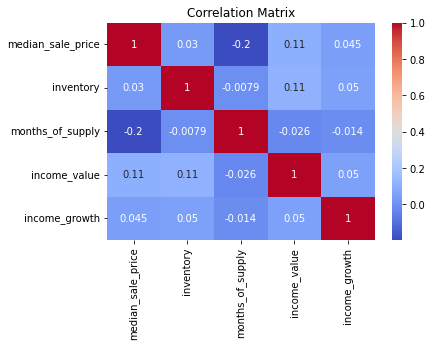

In [0]:
# Convert to Pandas
numeric_data_pd = numeric_data_cleaned.toPandas()

# Calculate correlation matrix
correlation_matrix = numeric_data_pd.corr()

# Display correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [0]:
from pyspark.sql.functions import when

# Define a new risk level with adjusted thresholds
merged_data = merged_data.withColumn(
    "risk_level",
    when((col("income_growth") < 0.05) & (col("months_of_supply") > 3), 1).otherwise(0)
)



In [0]:
merged_data.show(10)

+----+--------+----------+-------------+-----------------+---------------------+-----------------+---------------------+-----------+----------------+----------+-------------+------------+---------+----------------+----------+-----------------+---------------+-----------+-----------------------+---------------+----+------------------+---------------+-------------------+------+--------------------+--------+------------+--------------------+----------+
|city|   state|state_code|property_type|median_sale_price|median_sale_price_mom|median_list_price|median_list_price_yoy|median_ppsf|median_list_ppsf|homes_sold|pending_sales|new_listings|inventory|months_of_supply|median_dom| avg_sale_to_list|sold_above_list|price_drops|off_market_in_two_weeks|Region Category|year|  price_volatility|inventory_trend|months_supply_trend|Region|         Description|Category|income_value|       income_growth|risk_level|
+----+--------+----------+-------------+-----------------+---------------------+------------

In [0]:
merged_data.select("risk_level").show(100)

+----------+
|risk_level|
+----------+
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         1|
|         1|
|         1|
|         0|
|         0|
|         0|
|         1|
|         0|
|         1|
|         1|
|         1|
|         1|
|         0|
|         1|
|         1|
|         0|
|         1|
|         0|
|         1|
|         0|
|         1|
|         1|
|         1|
|         0|
|         1|
|         0|
|         1|
|         1|
|         1|
|         0|
|         1|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|

In [0]:
# Check the schema
merged_data.printSchema()

# Show a few rows of the data
merged_data.show(5)


root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- state_code: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- median_sale_price: integer (nullable = true)
 |-- median_sale_price_mom: double (nullable = true)
 |-- median_list_price: double (nullable = true)
 |-- median_list_price_yoy: double (nullable = true)
 |-- median_ppsf: double (nullable = true)
 |-- median_list_ppsf: double (nullable = true)
 |-- homes_sold: integer (nullable = true)
 |-- pending_sales: double (nullable = true)
 |-- new_listings: double (nullable = true)
 |-- inventory: double (nullable = true)
 |-- months_of_supply: double (nullable = true)
 |-- median_dom: double (nullable = true)
 |-- avg_sale_to_list: double (nullable = true)
 |-- sold_above_list: double (nullable = true)
 |-- price_drops: double (nullable = true)
 |-- off_market_in_two_weeks: double (nullable = true)
 |-- Region Category: string (nullable = true)
 |-- year: integer (nullable = true)

In [0]:
# Drop rows with null values in feature columns
feature_columns = ["median_sale_price", "inventory", "months_of_supply", "income_value", "income_growth"]
merged_data_cleaned = merged_data.dropna(subset=feature_columns)
merged_data_cleaned.show(10)


+----+--------+----------+-------------+-----------------+---------------------+-----------------+---------------------+-----------+----------------+----------+-------------+------------+---------+----------------+----------+-----------------+---------------+-----------+-----------------------+---------------+----+------------------+---------------+-------------------+------+--------------------+--------+------------+--------------------+----------+
|city|   state|state_code|property_type|median_sale_price|median_sale_price_mom|median_list_price|median_list_price_yoy|median_ppsf|median_list_ppsf|homes_sold|pending_sales|new_listings|inventory|months_of_supply|median_dom| avg_sale_to_list|sold_above_list|price_drops|off_market_in_two_weeks|Region Category|year|  price_volatility|inventory_trend|months_supply_trend|Region|         Description|Category|income_value|       income_growth|risk_level|
+----+--------+----------+-------------+-----------------+---------------------+------------

In [0]:
from pyspark.sql.functions import mean

# Impute nulls with mean for each feature
for column in feature_columns:
    mean_value = merged_data.select(mean(column)).collect()[0][0]
    merged_data = merged_data.fillna({column: mean_value})
    merged_data.show(10)


+----+--------+----------+-------------+-----------------+---------------------+-----------------+---------------------+-----------+----------------+----------+-------------+------------+---------+----------------+----------+-----------------+---------------+-----------+-----------------------+---------------+----+------------------+---------------+-------------------+------+--------------------+--------+------------+--------------------+----------+
|city|   state|state_code|property_type|median_sale_price|median_sale_price_mom|median_list_price|median_list_price_yoy|median_ppsf|median_list_ppsf|homes_sold|pending_sales|new_listings|inventory|months_of_supply|median_dom| avg_sale_to_list|sold_above_list|price_drops|off_market_in_two_weeks|Region Category|year|  price_volatility|inventory_trend|months_supply_trend|Region|         Description|Category|income_value|       income_growth|risk_level|
+----+--------+----------+-------------+-----------------+---------------------+------------

In [0]:
# Cast columns to double (or float) type
for column in feature_columns:
    merged_data = merged_data.withColumn(column, col(column).cast("double"))
merged_data.show(10)

+----+--------+----------+-------------+-----------------+---------------------+-----------------+---------------------+-----------+----------------+----------+-------------+------------+---------+----------------+----------+-----------------+---------------+-----------+-----------------------+---------------+----+------------------+---------------+-------------------+------+--------------------+--------+------------+--------------------+----------+
|city|   state|state_code|property_type|median_sale_price|median_sale_price_mom|median_list_price|median_list_price_yoy|median_ppsf|median_list_ppsf|homes_sold|pending_sales|new_listings|inventory|months_of_supply|median_dom| avg_sale_to_list|sold_above_list|price_drops|off_market_in_two_weeks|Region Category|year|  price_volatility|inventory_trend|months_supply_trend|Region|         Description|Category|income_value|       income_growth|risk_level|
+----+--------+----------+-------------+-----------------+---------------------+------------

In [0]:
from pyspark.ml.feature import VectorAssembler

# Assemble features into a single column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
final_data = assembler.transform(merged_data)
final_data.show(10)


+----+--------+----------+-------------+-----------------+---------------------+-----------------+---------------------+-----------+----------------+----------+-------------+------------+---------+----------------+----------+-----------------+---------------+-----------+-----------------------+---------------+----+------------------+---------------+-------------------+------+--------------------+--------+------------+--------------------+----------+--------------------+
|city|   state|state_code|property_type|median_sale_price|median_sale_price_mom|median_list_price|median_list_price_yoy|median_ppsf|median_list_ppsf|homes_sold|pending_sales|new_listings|inventory|months_of_supply|median_dom| avg_sale_to_list|sold_above_list|price_drops|off_market_in_two_weeks|Region Category|year|  price_volatility|inventory_trend|months_supply_trend|Region|         Description|Category|income_value|       income_growth|risk_level|            features|
+----+--------+----------+-------------+----------

In [0]:
# Print schema to verify the features column
final_data.printSchema()

# Show a sample of the transformed dataset
final_data.select("features", "risk_level").show(5, truncate=False)


root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- state_code: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- median_sale_price: double (nullable = true)
 |-- median_sale_price_mom: double (nullable = true)
 |-- median_list_price: double (nullable = true)
 |-- median_list_price_yoy: double (nullable = true)
 |-- median_ppsf: double (nullable = true)
 |-- median_list_ppsf: double (nullable = true)
 |-- homes_sold: integer (nullable = true)
 |-- pending_sales: double (nullable = true)
 |-- new_listings: double (nullable = true)
 |-- inventory: double (nullable = false)
 |-- months_of_supply: double (nullable = false)
 |-- median_dom: double (nullable = true)
 |-- avg_sale_to_list: double (nullable = true)
 |-- sold_above_list: double (nullable = true)
 |-- price_drops: double (nullable = true)
 |-- off_market_in_two_weeks: double (nullable = true)
 |-- Region Category: string (nullable = true)
 |-- year: integer (nullable = true

In [0]:
# Split the data
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)


In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(labelCol="risk_level", featuresCol="features")
dt_model = dt.fit(train_data)


In [0]:
# Make predictions
dt_predictions = dt_model.transform(test_data)


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="risk_level", predictionCol="prediction", metricName="accuracy")
dt_accuracy = evaluator.evaluate(dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")


Decision Tree Accuracy: 0.994853505619924


In [0]:
from pyspark.ml.classification import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(labelCol="risk_level", featuresCol="features", numTrees=100)
rf_model = rf.fit(train_data)


In [0]:
# Make predictions
rf_predictions = rf_model.transform(test_data)


In [0]:
# Evaluate accuracy
rf_accuracy = evaluator.evaluate(rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.995388167543333


In [0]:
from pyspark.ml.classification import LogisticRegression

# Initialize Logistic Regression
lr = LogisticRegression(featuresCol="features", labelCol="risk_level")

# Train the model
lr_model = lr.fit(train_data)


In [0]:
# Make predictions
lr_predictions = lr_model.transform(test_data)

# Show predictions
lr_predictions.select("risk_level", "prediction", "probability").show(5, truncate=False)


+----------+----------+-----------------------------------------+
|risk_level|prediction|probability                              |
+----------+----------+-----------------------------------------+
|1         |1.0       |[0.0554353606721569,0.9445646393278431]  |
|1         |1.0       |[0.056469075028053754,0.9435309249719462]|
|1         |1.0       |[0.05249893740960034,0.9475010625903997] |
|0         |0.0       |[0.7529643482407664,0.2470356517592336]  |
|1         |1.0       |[0.051129489668695204,0.9488705103313048]|
+----------+----------+-----------------------------------------+
only showing top 5 rows



In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize evaluator
evaluator = BinaryClassificationEvaluator(labelCol="risk_level", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Evaluate the model
roc_auc = evaluator.evaluate(lr_predictions)
print(f"ROC-AUC: {roc_auc}")


ROC-AUC: 0.9369003565674814


+----------+----------+------+
|risk_level|prediction| count|
+----------+----------+------+
|         1|       0.0| 34712|
|         0|       0.0|194520|
|         1|       1.0| 87539|
|         0|       1.0| 18020|
+----------+----------+------+



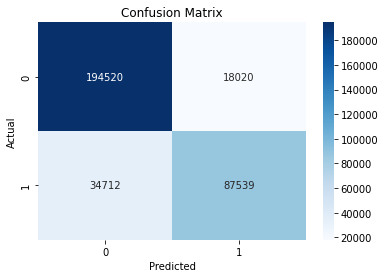

In [0]:
# Confusion Matrix
lr_predictions.groupBy("risk_level", "prediction").count().show()

# Convert predictions to Pandas for visualization
lr_predictions_pd = lr_predictions.select("risk_level", "prediction").toPandas()

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(lr_predictions_pd["risk_level"], lr_predictions_pd["prediction"])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [0]:
# Feature importance
importances = rf_model.featureImportances
for i, feature in enumerate(feature_columns):
    print(f"{feature}: {importances[i]}")


median_sale_price: 0.008293852523468329
inventory: 0.0018899049116107322
months_of_supply: 0.4798176246736627
income_value: 0.022650852710637305
income_growth: 0.48734776518062106


In [0]:
# Confusion Matrix
rf_predictions.groupBy("risk_level", "prediction").count().show()


+----------+----------+------+
|risk_level|prediction| count|
+----------+----------+------+
|         1|       0.0|   781|
|         0|       0.0|211777|
|         1|       1.0|121470|
|         0|       1.0|   763|
+----------+----------+------+



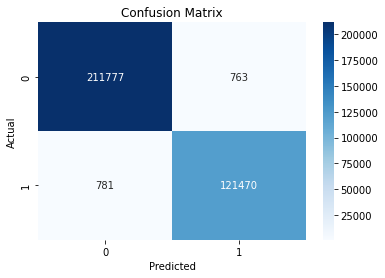

In [0]:
# Convert predictions to Pandas
rf_predictions_pd = rf_predictions.select("risk_level", "prediction").toPandas()

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(rf_predictions_pd["risk_level"], rf_predictions_pd["prediction"])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
